In [1]:
import numpy

from matplotlib import pyplot
from numpy import random
from scipy import stats

In [2]:
_BASE_SEED = "Time now for ChApTeR SeVeN where the prize money DOUBELS."

def fresh_prng(seed: str):
    return random.default_rng(seed=abs(hash(_BASE_SEED + seed)) % (2 ** 32))

## 7.1, Regression predictors

> In the election forecasting example of Section 7.1, we used inflation adjusted
> growth in average personal income as a predictor. From the standpoint of
> economics, it makes sense to adjust for inflation here. But suppose the model
> had used growth in average personal income, not adjusting for inflation. How
> would this have changed the resulting regression? How would this change have
> affected the fit and interpretation of the results?

In [3]:
# https://github.com/avehtari/ROS-Examples/blob/master/ElectionsEconomy/data/hibbs.dat
hibbs_dat = '''year growth vote inc_party_candidate other_candidate
1952 2.4 44.6 "Stevenson" "Eisenhower"
1956 2.89 57.76 "Eisenhower" "Stevenson"
1960 .85 49.91 "Nixon" "Kennedy"
1964 4.21 61.34 "Johnson" "Goldwater"
1968 3.02 49.60 "Humphrey" "Nixon"
1972 3.62 61.79 "Nixon" "McGovern"
1976 1.08 48.95 "Ford" "Carter"
1980 -.39 44.70 "Carter" "Reagan"
1984 3.86 59.17 "Reagan" "Mondale"
1988 2.27 53.94 "Bush, Sr." "Dukakis"
1992 .38 46.55 "Bush, Sr." "Clinton"
1996 1.04 54.74 "Clinton" "Dole"
2000 2.36 50.27 "Gore" "Bush, Jr."
2004 1.72 51.24 "Bush, Jr." "Kerry"
2008 .1 46.32 "McCain" "Obama"
2012 .95 52.00 "Obama" "Romney"'''

hibbs = {}  # Year -> (growth, vote)
for line in hibbs_dat.split('\n')[1:]:
    spline = line.split()
    hibbs[int(spline[0])] = (float(spline[1]), float(spline[2]))

# https://www.investopedia.com/inflation-rate-by-year-7253832
inflation = {
    1952: 0.8,
    1956: 3,
    1960: 1.4,
    1964: 1,
    1968: 4.7,
    1972: 3.4,
    1976: 4.9,
    1980: 12.5,
    1984: 3.9,
    1988: 4.4,
    1992: 2.9,
    1996: 3.3,
    2000: 3.4,
    2004: 3.3,
    2008: 0.1,
    2012: 1.7
}

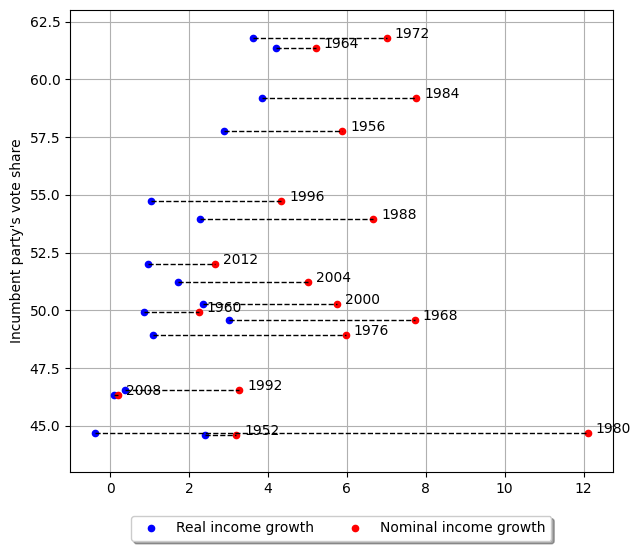

In [4]:
years = list(sorted(hibbs.keys()))
xs_real = [hibbs[year][0] for year in years]
xs_nom = [hibbs[year][0] + inflation[year] for year in years]
ys = [hibbs[year][1] for year in years]

fig = pyplot.figure(figsize=(7,6))
ax = fig.gca()
ax.plot(xs_real, ys, 'b.', label='Real income growth', markersize=9)
ax.plot(xs_nom, ys, 'r.', label='Nominal income growth', markersize=9)
ax.set_ylabel("Incumbent party's vote share")
ax.set_ylim(43, 63)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=5)
ax.grid()

for year, xr, xn, y in zip(years, xs_real, xs_nom, ys):
    ax.plot([xr, xn], [y, y], linewidth=1, linestyle='--', color='k')
    ax.text(xn + 0.2, y, str(year))
    

Real income: 0.58
Nominal income: 0.03


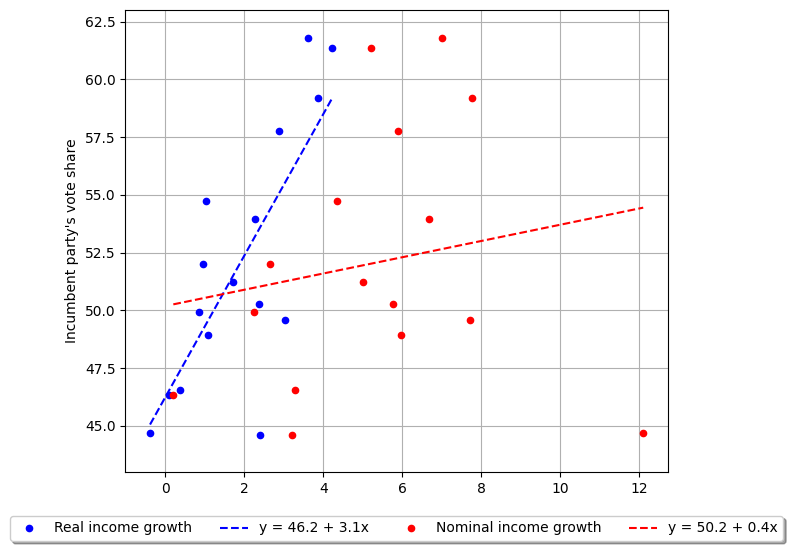

In [5]:
model_real = stats.linregress(xs_real, ys)
model_nom = stats.linregress(xs_nom, ys)
print(f'Real income: {model_real.rvalue ** 2:0.2f}')
print(f'Nominal income: {model_nom.rvalue ** 2:0.2f}')

fig = pyplot.figure(figsize=(7,6))
ax = fig.gca()
ax.plot(xs_real, ys, 'b.', label='Real income growth', markersize=9)
ax.plot(
    [min(xs_real), max(xs_real)],
    [
        model_real.intercept + model_real.slope * min(xs_real),
        model_real.intercept + model_real.slope * max(xs_real),
    ],
    'b--',
    label=f'y = {model_real.intercept:0.1f} + {model_real.slope:0.1f}x',
)


ax.plot(xs_nom, ys, 'r.', label='Nominal income growth', markersize=9)
ax.plot(
    [min(xs_nom), max(xs_nom)],
    [
        model_nom.intercept + model_nom.slope * min(xs_nom),
        model_nom.intercept + model_nom.slope * max(xs_nom),
    ],
    'r--',
    label=f'y = {model_nom.intercept:0.1f} + {model_nom.slope:0.1f}x',
)

ax.set_ylabel("Incumbent party's vote share")
ax.set_ylim(43, 63)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=5)
ax.grid()

## 7.2, Fake-data simulation and regression

> Simulate 100 data points from the linear model, $y = a + bx + \text{error}$,
> with $a = 5$, $b = 7$, the values of x being sampled at random from a uniform
> distribution on the range [0, 50], and errors that are normally distributed
> with mean 0 and standard deviation 3.
>
> (a) Fit a regression line to these data and display the output.
> 
> (b) Graph a scatterplot of the data and the regression line.
> 
> (c) Use the text function in R to add the formula of the fitted line to the graph.

*  **Slope:** 7.02
*  **Slope stderr:** 0.02
*  **Intercept:** 4.47
*  **Intercept stderr:** 0.59
*  **RValue:** 1.00
*  **PValue:** 0.00


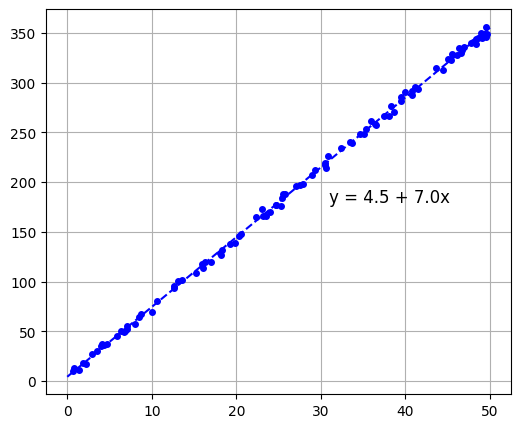

In [6]:
rng = fresh_prng('Exercise 7.2')
n = 100
xs = rng.uniform(low=0, high=50, size=n)
ys = 5 + 7 * xs + rng.normal(loc=0, scale=3, size=n)

model = stats.linregress(xs, ys)

fig = pyplot.figure(figsize=(6,5))
ax = fig.gca()
ax.plot(xs, ys, 'b.', markersize=8)
ax.plot([0, 50], [model.intercept, model.intercept + model.slope * 50], 'b--')
ax.text(31, 180, f'y = {model.intercept:0.1f} + {model.slope:0.1f}x', size='large')
ax.grid()

print(f'*  **Slope:** {model.slope:0.2f}')
print(f'*  **Slope stderr:** {model.stderr:0.2f}')
print(f'*  **Intercept:** {model.intercept:0.2f}')
print(f'*  **Intercept stderr:** {model.intercept_stderr:0.2f}')
print(f'*  **RValue:** {model.rvalue:0.2f}')
print(f'*  **PValue:** {model.pvalue:0.2f}')

## 7.3, Fake-data simulation and fitting the wrong model

> Simulate 100 data points from the model, $y = a + bx + cx^2 + \text{error}$,
> with the values of x being sampled at random from a uniform distribution on
> the range [0, 50], errors that are normally distributed with mean 0 and
> standard deviation 3, and $a$, $b$, $c$ chosen so that a scatterplot of the
> data shows a clear nonlinear curve.
>
> (a) Fit a regression line `stan_glm(y ~ x)` to these data and display the
> output.
>
> (b) Graph a scatterplot of the data and the regression line. This is the
> best-fit linear regression. What does “best-fit” mean in this context?

*  **Slope:** 1.14
*  **Slope stderr:** 0.66
*  **Intercept:** 128.87
*  **Intercept stderr:** 20.56
*  **RValue:** 0.17
*  **PValue:** 0.09


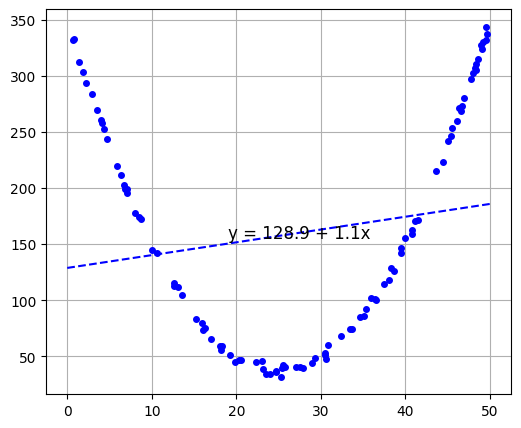

In [7]:
rng = fresh_prng('Exercise 7.2')
n = 100
a = 350
b = -25
c = 0.5
xs = rng.uniform(low=0, high=50, size=n)
ys = a + b * xs + c * xs * xs + rng.normal(loc=0, scale=3, size=n)

model = stats.linregress(xs, ys)

fig = pyplot.figure(figsize=(6,5))
ax = fig.gca()
ax.plot(xs, ys, 'b.', markersize=8)
ax.plot([0, 50], [model.intercept, model.intercept + model.slope * 50], 'b--')
ax.text(19, 155, f'y = {model.intercept:0.1f} + {model.slope:0.1f}x', size='large')
ax.grid()

print(f'*  **Slope:** {model.slope:0.2f}')
print(f'*  **Slope stderr:** {model.stderr:0.2f}')
print(f'*  **Intercept:** {model.intercept:0.2f}')
print(f'*  **Intercept stderr:** {model.intercept_stderr:0.2f}')
print(f'*  **RValue:** {model.rvalue:0.2f}')
print(f'*  **PValue:** {model.pvalue:0.2f}')

## 7.5, Convergence as sample size increases

> Set up a simulation study such as in Section 7.2, writing the entire
> simulation as a function, with one of the arguments being the number of data
> points, $n$. Compute the simulation for $n =$ 10, 30, 100, 300, 1000, 3000,
> 10 000, and 30 000, for each displaying the estimate and standard error.
> Graph these to show the increasing stability as $n$ increases.

$n$ | $\hat{b}$ | std. err
--- | --------- | --------
10 | 2.5 | 0.99
30 | 3.5 | 0.61
100 | 3.1 | 0.26
300 | 2.9 | 0.18
1000 | 3.0 | 0.10
3000 | 3.1 | 0.05
10000 | 3.0 | 0.03
30000 | 3.0 | 0.02


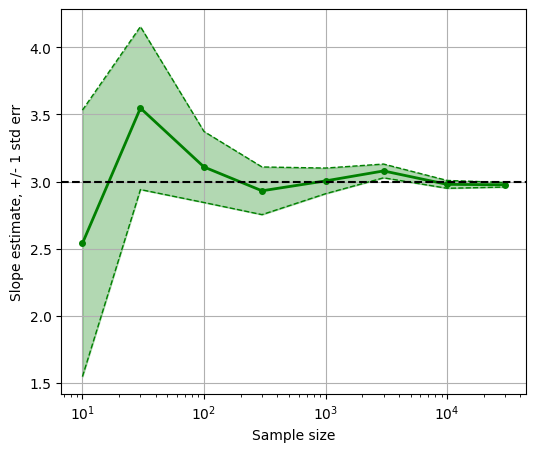

In [8]:
rng = fresh_prng('Seed for Exercise 7.5')
a = 46.3
b = 3.0
sigma = 3.9
min_growth = min([growth for growth, _ in hibbs.values()])
max_growth = max([growth for growth, _ in hibbs.values()])

def simulate(n: int):
    xs = rng.uniform(low=min_growth, high=max_growth, size=n)
    ys = a + b * xs + rng.normal(loc=0, scale=sigma, size=n)
    return stats.linregress(xs, ys)

ns = [10, 30, 100, 300, 1000, 3000, 10_000, 30_000]
models = [simulate(ni) for ni in ns]

print('$n$ | $\hat{b}$ | std. err')
print('--- | --------- | --------')
for n, m in zip(ns, models):
    print(f'{n} | {m.slope:0.1f} | {m.stderr:0.2f}')

bhat = [m.slope for m in models]
bhat_lo = [m.slope - m.stderr for m in models]
bhat_hi = [m.slope + m.stderr for m in models]

fig = pyplot.figure(figsize=(6, 5))
ax = fig.gca()
ax.semilogx(ns, bhat, 'g.-', linewidth=2, markersize=8)
ax.semilogx(ns, bhat_lo, 'g--', linewidth=1)
ax.semilogx(ns, bhat_hi, 'g--', linewidth=1)
#ax.semilogx([ns[0], ns[-1]], [b, b], 'k--', zorder=1)
ax.axhline(y=b, linestyle='--', color='k')
ax.fill_between(ns, bhat_lo, bhat_hi, color='g', alpha=0.3)
ax.set_xlabel('Sample size')
ax.set_ylabel('Slope estimate, +/- 1 std err')
ax.grid(zorder=0)
    

## 7.6, Formulating comparisons as regression models

> Take the election forecasting model and simplify it by creating a binary
> predictor defined as $x = 0$ if income growth is less than 2% and $x = 1$ if
> income growth is more than 2%.
>
> (a) Compute the difference in incumbent party’s vote share on average,
> comparing those two groups of elections, and determine the standard error for
> this difference.
>
> (b) Regress incumbent party’s vote share on the binary predictor of income
> growth and check that the resulting estimate and standard error are the same
> as above.

### 7.6(a)

In [9]:
lo_growth_shares = []
hi_growth_shares = []
for growth, vote_share in hibbs.values():
    if growth < 2:
        lo_growth_shares.append(vote_share)
    else:
        hi_growth_shares.append(vote_share)

theta_hat = numpy.mean(hi_growth_shares) - numpy.mean(lo_growth_shares)
s_lo = numpy.std(lo_growth_shares)
s_hi = numpy.std(hi_growth_shares)
theta_stderr = numpy.sqrt((s_lo ** 2)/len(lo_growth_shares) + (s_hi ** 2)/len(hi_growth_shares))

print(f'Avg. diff: {theta_hat:0.1f} +/- {theta_stderr:0.2f}')

Avg. diff: 5.5 +/- 2.34


### 7.6(b)

In [10]:
xs = []
ys = []
for growth, vote_share in hibbs.values():
    xs.append(1 if growth >= 2 else 0)
    ys.append(vote_share)
model = stats.linregress(xs, ys)
print(f'Slope: {model.slope:0.1f} +/- {model.stderr:0.2f}')

Slope: 5.5 +/- 2.50


## 7.7, Comparing simulated data to assumed parameter values

> (a) Simulate 100 data points from the model, $y = 2 + 3x + \text{error}$, with
> predictors x drawn from a uniform distribution from 0 to 20, and with
> independent errors drawn from the normal distribution with mean 0 and standard
> deviation 5. Save $x$ and $y$ into a data frame called `fake`. Fit the model,
> `stan_glm(y ~ x, data=fake)`. Plot the data and fitted regression line.
>
> (b) Check that the estimated coefficients from the fitted model are reasonably
> close to the assumed true values. What does “reasonably close” mean in this
> context?

*  **Slope:** 3.12
*  **Slope stderr:** 0.08
*  **Intercept:** 0.09
*  **Intercept stderr:** 0.94


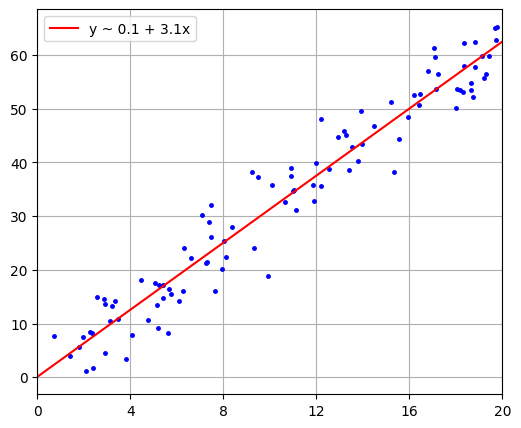

In [11]:
rng = fresh_prng('Exercise 7.7')
xs = rng.uniform(low=0, high=20, size=100)
ys = 2 + 3 * xs + rng.normal(loc=0, scale=5, size=100)
model = stats.linregress(xs, ys)

fig = pyplot.figure(figsize=(6, 5))
ax = fig.gca()
ax.plot(xs, ys, 'b.', markersize=5)
ax.plot(
    [0, 20],
    [model.intercept, model.intercept + model.slope * 20],
    'r-',
    label=f'y ~ {model.intercept:0.1f} + {model.slope:0.1f}x'
)
ax.set_xlim(0, 20)
ax.set_xticks([0, 4, 8, 12, 16, 20])
ax.set_xticklabels([0, 4, 8, 12, 16, 20])
ax.legend()
ax.grid()

print(f'*  **Slope:** {model.slope:0.2f}')
print(f'*  **Slope stderr:** {model.stderr:0.2f}')
print(f'*  **Intercept:** {model.intercept:0.2f}')
print(f'*  **Intercept stderr:** {model.intercept_stderr:0.2f}')

## 7.8, Sampling distribution

> Repeat the steps of the previous exercise 1000 times (omitting the plotting).
> Check that the coefficient estimates are approximately unbiased, that their
> standard deviations in the sampling distribution are approximately equal to
> their standard errors, and that approximately 95% of the estimate $\pm 2$
> standard error intervals contain the true parameter values.

In [12]:
rng = fresh_prng('Exercise 7.8')
a = 2
b = 3
models = []
for _ in range(1000):
    xs = rng.uniform(low=0, high=20, size=100)
    ys = a + b * xs + rng.normal(loc=0, scale=5, size=100)
    models.append(stats.linregress(xs, ys))

print('Quantity | Got | Want')
print('-------- | --- | ----')
print(f'Mean slope estimate | {numpy.mean([m.slope for m in models]):0.2f} | 3.00')
print(f'Mean intercept estimate | {numpy.mean([m.intercept for m in models]):0.2f} | 2.00')
print(f'Slope estimate std | {numpy.std([m.slope for m in models]):0.2f} | 0.08')
print(f'Intercept estimate std | {numpy.std([m.intercept for m in models]):0.2f} | 1.00')
print(f'Slope coverage rate | {0.1 * sum(1 if abs(m.slope - b) < (2 * m.stderr) else 0 for m in models):0.1f}% | 95%')
print(f'Intercept coverage rate | {0.1 * sum(1 if abs(m.intercept - a) < (2 * m.intercept_stderr) else 0 for m in models):0.1f}% | 95%')

Quantity | Got | Want
-------- | --- | ----
Mean slope estimate | 3.00 | 3.00
Mean intercept estimate | 1.99 | 2.00
Slope estimate std | 0.09 | 0.08
Intercept estimate std | 1.03 | 1.00
Slope coverage rate | 94.4% | 95%
Intercept coverage rate | 95.1% | 95%


## 7.9, Interpretation of regressions

> Redo the election forecasting example of Section 7.1, but switching $x$ and 
> $y$, that is, predicting economic growth given the subsequent election
> outcome. Discuss the problems with giving a causal interpretation to the
> coefficients in this regression, and consider what this implies about any
> causal interpretations of the original regression fit in the chapter.

*  **Slope:** 0.19
*  **Slope stderr:** 0.04
*  **Intercept:** -7.96
*  **Intercept stderr:** 2.26
*  **Coef. of Determination:**  0.58


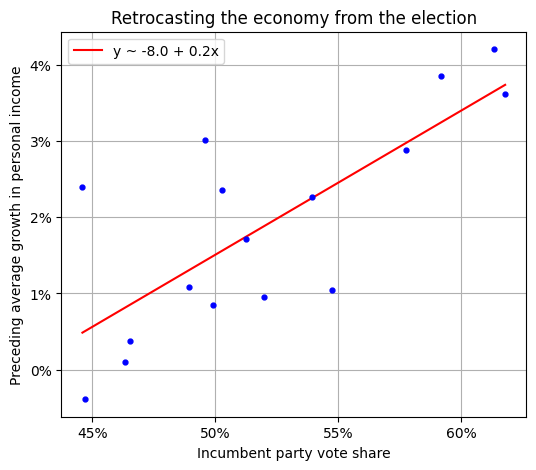

In [13]:
xs = [vote for _, vote in sorted(hibbs.values())]
ys = [growth for growth, _ in sorted(hibbs.values())]
model = stats.linregress(xs, ys)

print(f'*  **Slope:** {model.slope:0.2f}')
print(f'*  **Slope stderr:** {model.stderr:0.2f}')
print(f'*  **Intercept:** {model.intercept:0.2f}')
print(f'*  **Intercept stderr:** {model.intercept_stderr:0.2f}')
print(f'*  **Coef. of Determination:** {model.rvalue ** 2: 0.2f}')

fig = pyplot.figure(figsize=(6, 5))
ax = fig.gca()
ax.plot(
    [min(xs), max(xs)],
    [
        model.intercept + model.slope * min(xs),
        model.intercept + model.slope * max(xs),
    ],
    'r-',
    label=f'y ~ {model.intercept:0.1f} + {model.slope:0.1f}x'
)
ax.plot(xs, ys, 'b.', markersize=7)
xticks = [45, 50, 55, 60]
ax.set_xticks(xticks)
ax.set_xticklabels([f'{xi}%' for xi in xticks])
yticks = [0, 1, 2, 3, 4]
ax.set_yticks(yticks)
ax.set_yticklabels([f'{yi}%' for yi in yticks])
ax.set_xlabel('Incumbent party vote share')
ax.set_ylabel('Preceding average growth in personal income')
ax.set_title('Retrocasting the economy from the election')
ax.legend()
ax.grid()